In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (12,7)

In [2]:
data = pd.read_csv('income_evaluation.csv')

In [3]:
data.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [4]:
data.shape

(32561, 15)

In [5]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
 workclass         32561 non-null object
 fnlwgt            32561 non-null int64
 education         32561 non-null object
 education-num     32561 non-null int64
 marital-status    32561 non-null object
 occupation        32561 non-null object
 relationship      32561 non-null object
 race              32561 non-null object
 sex               32561 non-null object
 capital-gain      32561 non-null int64
 capital-loss      32561 non-null int64
 hours-per-week    32561 non-null int64
 native-country    32561 non-null object
 income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
del data[' fnlwgt']
del data[' education-num']
del data[' relationship']

In [8]:
data.columns

Index(['age', ' workclass', ' education', ' marital-status', ' occupation',
       ' race', ' sex', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' native-country', ' income'],
      dtype='object')

In [9]:
data.columns=['age', 'workclass', 'education', 'married', 'occupation',\
              'race', 'sex', 'gain', 'loss', 'hours', 'country',  'income']

In [10]:
data.columns

Index(['age', 'workclass', 'education', 'married', 'occupation', 'race', 'sex',
       'gain', 'loss', 'hours', 'country', 'income'],
      dtype='object')

In [11]:
data = data[data.country == ' United-States']
del data['country']

In [12]:
data = data[data.gain == 0]
del data['gain']

In [13]:
data = data[data.loss == 0]
del data['loss']

In [17]:
data.count()

age           25320
workclass     25320
education     25320
married       25320
occupation    25320
race          25320
sex           25320
hours         25320
income        25320
dtype: int64

In [18]:
data.head(1)

,age,workclass,education,married,occupation,race,sex,hours,income
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,<=50K


In [19]:
data.shape

(25320, 9)

In [20]:
data = data[data.workclass != ' ?']
data = data[data.occupation != ' ?']

In [21]:
data.shape

(23816, 9)

In [22]:
data.head(3)

,age,workclass,education,married,occupation,race,sex,hours,income
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,<=50K


## Under 5,000 people make 50K from the dataset

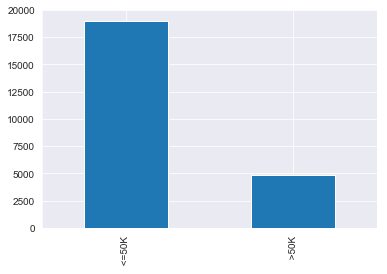

In [23]:
data.income.value_counts().plot.bar()

## A greator ratio of men make above 50K

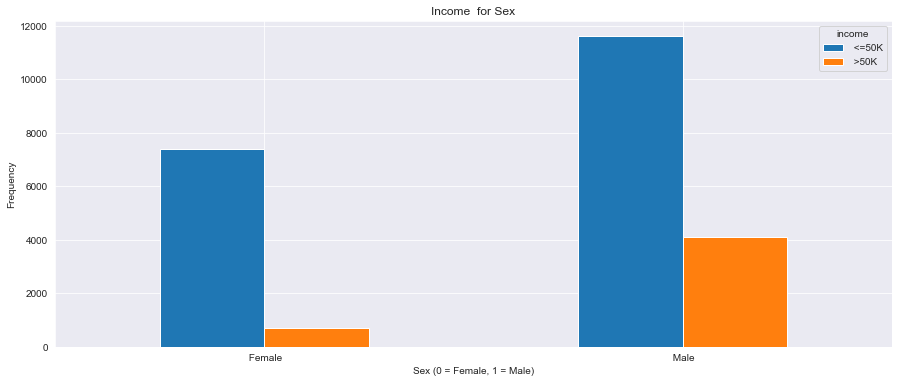

In [24]:
pd.crosstab(data.sex,data.income).plot(kind="bar",figsize=(15,6))
plt.title('Income  for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## A Masters degree gives almost a 50% chance of making more than 50K

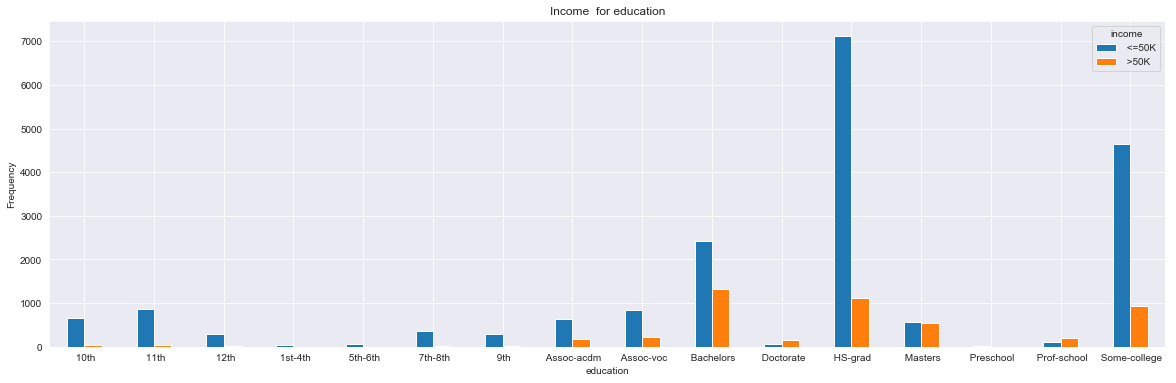

In [25]:
pd.crosstab(data.education,data.income).plot(kind="bar",figsize=(20,6))
plt.title('Income  for education')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## Even with a Masters degree a male is still 4x more likely to make over 50K

In [27]:
m = data[data.education == ' Masters' ]

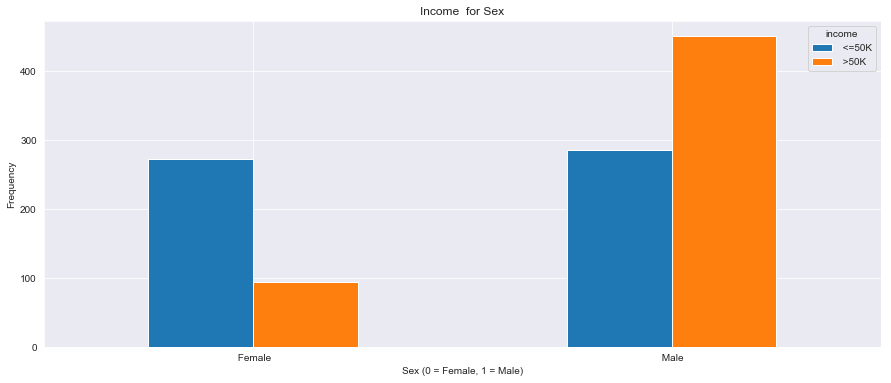

In [28]:
pd.crosstab(m.sex,data.income).plot(kind="bar",figsize=(15,6))
plt.title('Income  for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [29]:
m[m.sex == ' Female'].income.value_counts()

 <=50K    273
 >50K      94
Name: income, dtype: int64

In [30]:
m[m.sex == ' Male'].income.value_counts()

 >50K     451
 <=50K    286
Name: income, dtype: int64

In [31]:
data[data.education != ' Masters'].income.value_counts()

 <=50K    18450
 >50K      4262
Name: income, dtype: int64

## If you are in management or a Profesional, you have a much better chance of making more than 50K

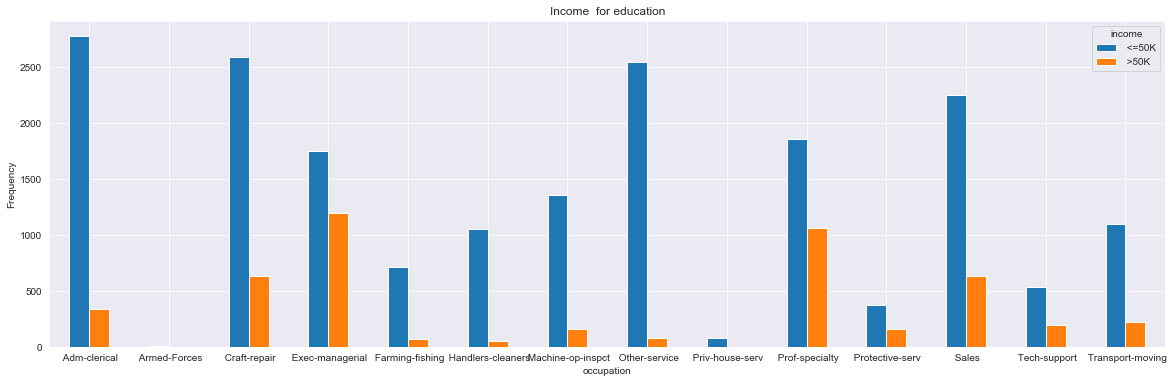

In [32]:
pd.crosstab(data.occupation,data.income).plot(kind="bar",figsize=(20,6))
plt.title('Income  for education')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## Working more than 60 hours a week greatly improves your chances.  

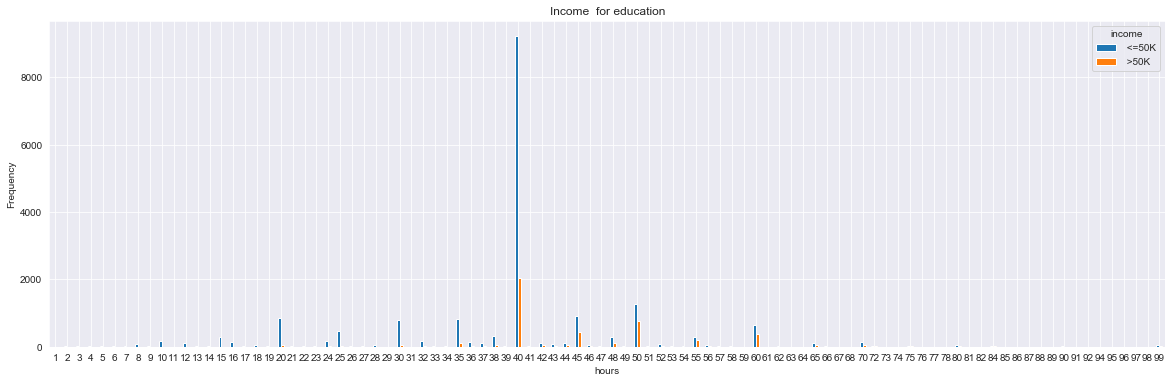

In [33]:
pd.crosstab(data.hours,data.income).plot(kind="bar",figsize=(20,6))
plt.title('Income  for education')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()